# **تمرین کامپیوتری صفر**
### **علی پاکدل صمدی**

### **۸۱۰۱۹۸۳۶۸**

**۱.**

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.stats as stats
from shapely.geometry import LineString

df = pd.read_csv('bank_term_deposit.csv')

print(df.info())
print(df.head())
print(df.tail())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB
None
    age          job  marital  education  ...  campaign pdays poutcome   y
0  30.0   unemployed  married    primary  ...         1    -1  unknown  no
1  33.0     services  married  secondary  ...         1   339  failure  no
2   NaN   management   single   tertiar

**۲.**

In [192]:
print(df.info())

df['marital'] = df['marital'].replace(to_replace= 'divorced', value= 0)
df['marital'] = df['marital'].replace(to_replace= 'single', value= 1)
df['marital'] = df['marital'].replace(to_replace= 'married', value= 2)

print(df['marital'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB
None
0       2.0
1       2.0
2       1.0
3       2.0
4       2.0
       ... 
4516    2.0
4517    2.0
4518    2.0
4519    2.0
4520    1.0
Name: marital, Length: 4521, dtype: float64


**۳.**

In [193]:
print(df.isna().sum())

age_mean = df['age'].mean()
df['age'] = df['age'].replace(to_replace= np.nan, value= age_mean)

marital_mode = df['marital'].mode()
df['marital'] = df['marital'].replace(to_replace= np.nan, value= marital_mode[0])

balance_mean = df['balance'].mean()
df['balance'] = df['balance'].replace(to_replace= np.nan, value= balance_mean)

housing_mode = df['housing'].mode()
df['housing'] = df['housing'].replace(to_replace= np.nan, value= housing_mode[0])

duration_mean = df['duration'].mean()
df['duration'] = df['duration'].replace(to_replace= np.nan, value= duration_mean)

new_df = df.loc[df['y'].isna()]
df = df.dropna()
print(df.isna().sum())

age          537
job            0
marital      120
education      0
balance      357
housing      219
loan           0
duration     133
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64
age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
duration     0
campaign     0
pdays        0
poutcome     0
y            0
dtype: int64


**۴.**

In [194]:
housing_vals = df['housing'].values

yes = housing_vals == 'yes'
no = housing_vals == 'no'

housing_yes = df.loc[yes, 'housing'].count()
housing_no = df.loc[no, 'housing'].count()

print("Number of people that have housing loan: ", housing_yes)
print("Number of people that don't have housing loan: ", housing_no)

y_vals = df['y'].values

yes = y_vals == 'yes'
no = y_vals == 'no'

y_yes = df.loc[yes, 'y'].count()
y_no = df.loc[no, 'y'].count()

print("Number of people that have term deposits: ", y_yes)
print("Number of people that don't have term deposits: ", y_no)

Number of people that have housing loan:  2389
Number of people that don't have housing loan:  1698
Number of people that have term deposits:  464
Number of people that don't have term deposits:  3623


**۵.**

In [195]:
age_vals = df['age'].values
marital_vals = df['marital'].values
poutcome_vals = df['poutcome'].values

age_higher35 = age_vals > 35
single = marital_vals == 1
poutcome_success = poutcome_vals == 'success'

criterias = df[age_higher35 & single & poutcome_success]

print("Number of single people with age higher than 35 and have been successfull in poutcome: ", len(criterias))

Number of single people with age higher than 35 and have been successfull in poutcome:  14


**۶.**

In [196]:
start = time.time()

education_vals = df['education'].values

sec_education = education_vals == 'secondary'
sec_edu_mean = df.loc[sec_education, 'balance'].mean()

print("Balance mean of people with secondary education: ", sec_edu_mean)

end = time.time()
vectorization_time = end - start
print("Time taken with vectorization: ", vectorization_time)

Balance mean of people with secondary education:  950.7017237980879
Time taken with vectorization:  0.003314495086669922


**۷.**

In [197]:
start = time.time()

balance_sum = 0
sec_edu_count = 0

size = len(df.index)

for i in range (0, size):
  if df['education'].values[i] == 'secondary':
    balance_sum += df['balance'].values[i]
    sec_edu_count += 1

print("Balance mean of people with secondary education: ", balance_sum / sec_edu_count)

end = time.time()
loop_time = end - start
print("Time taken with loop: ", loop_time)

print("Efficiency of vectorization method: ", loop_time / vectorization_time)

Balance mean of people with secondary education:  950.7017237980879
Time taken with loop:  0.027594327926635742
Efficiency of vectorization method:  8.325348870666092


**۸.**

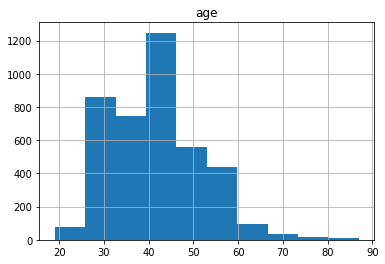

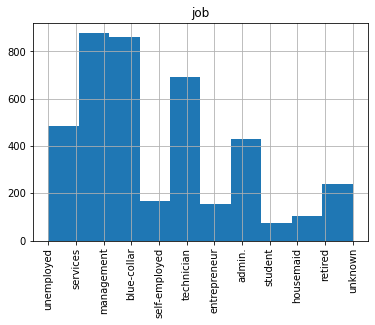

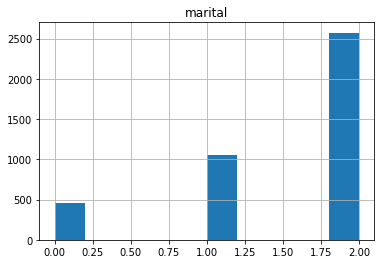

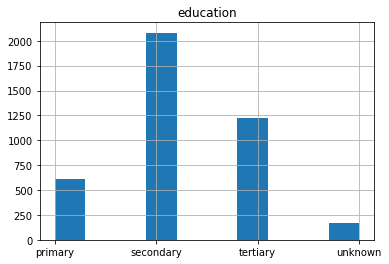

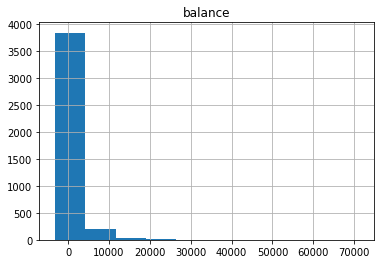

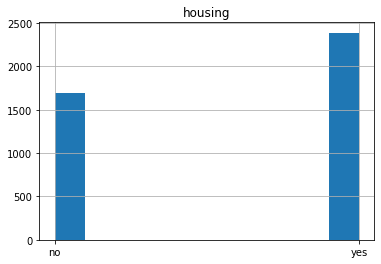

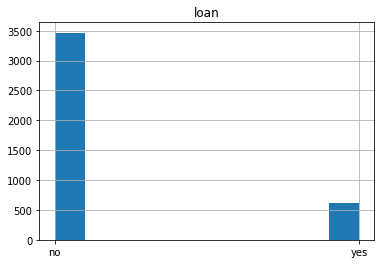

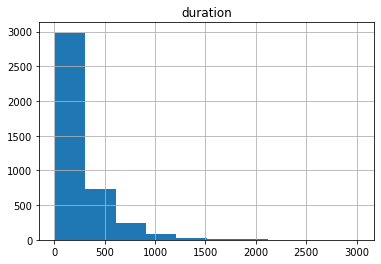

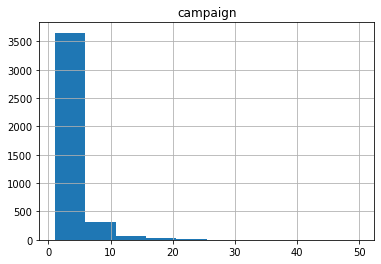

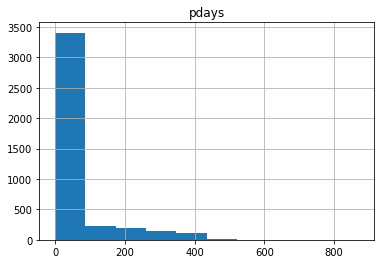

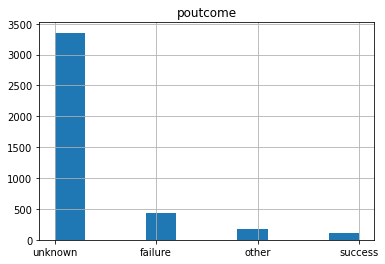

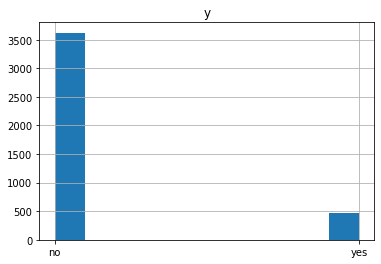

In [198]:
cols = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'poutcome', 'y']
for col in cols:
  df[col].hist()
  plt.title(col)
  if col == 'job':
    plt.xticks(rotation='vertical')
  plt.show()


**۹.**

In [199]:
cols = ['age', 'balance', 'duration', 'campaign', 'pdays']

for col in cols:
  col_mean = df[col].mean()
  col_std = df[col].std()
  df[col] = (df[col] - col_mean) / col_std

df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,-1.154366,unemployed,2.0,primary,0.255388,no,no,-0.724620,-0.573012,-0.404051,unknown,no
1,-0.856422,services,2.0,secondary,1.406374,yes,yes,-0.005131,-0.573012,3.031432,failure,no
2,-0.000582,management,1.0,tertiary,-0.378000,yes,no,-0.313979,-0.573012,2.940492,failure,no
3,-1.154366,management,2.0,tertiary,0.136148,yes,yes,-0.259744,0.380660,-0.404051,unknown,no
4,1.725758,blue-collar,2.0,secondary,0.006078,yes,no,-0.155147,-0.573012,-0.404051,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.856422,services,2.0,secondary,-0.557434,yes,no,0.243872,0.698550,-0.404051,unknown,no
4517,1.527129,self-employed,2.0,tertiary,-1.699986,yes,yes,-0.437946,-0.573012,-0.404051,unknown,no
4518,1.527129,technician,2.0,secondary,-0.316655,no,no,-0.445694,2.605894,-0.404051,unknown,no
4519,-1.352996,blue-collar,2.0,secondary,0.006173,no,no,-0.530922,0.380660,1.738074,other,no


**۱۰.**

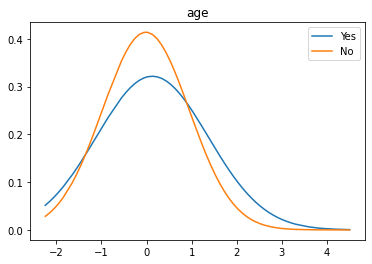

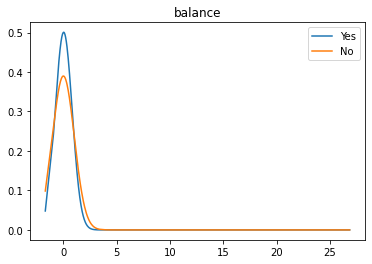

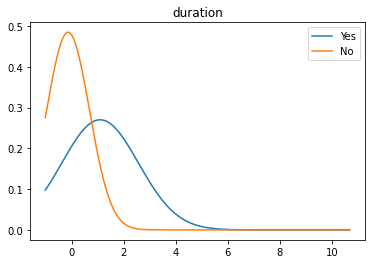

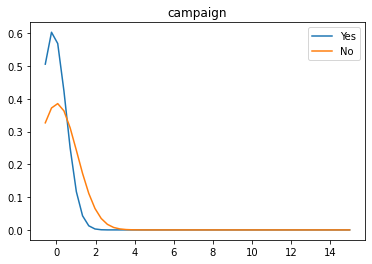

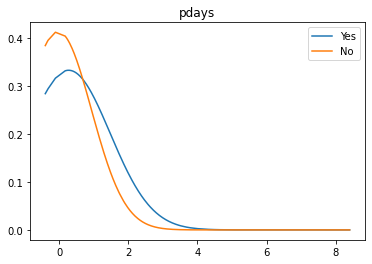

In [200]:
y_vals = df['y'].values

y_yes = y_vals == 'yes'
y_no = y_vals == 'no'

cols = ['age', 'balance', 'duration', 'campaign', 'pdays']
for col in cols:
  yes_col_mean = df.loc[y_yes, col].mean()
  yes_col_std = df.loc[y_yes, col].std()

  no_col_mean = df.loc[y_no, col].mean()
  no_col_std = df.loc[y_no, col].std()

  yes_norm = stats.norm(yes_col_mean, yes_col_std)
  no_norm = stats.norm(no_col_mean, no_col_std)

  plt.plot(df[col].sort_values(), yes_norm.pdf(df[col].sort_values()), label="Yes")
  plt.plot(df[col].sort_values(), no_norm.pdf(df[col].sort_values()), label="No")
  plt.title(col)
  plt.legend(loc= "best")
  plt.show()

**۱۱.**

In [201]:
y_vals = df['y'].values

y_yes = y_vals == 'yes'
y_no = y_vals == 'no'

yes_dur_mean = df.loc[y_yes, 'duration'].mean()
yes_dur_std = df.loc[y_yes, 'duration'].std()

no_dur_mean = df.loc[y_no, 'duration'].mean()
no_dur_std = df.loc[y_no, 'duration'].std()

yes_dur_norm = stats.norm(yes_dur_mean, yes_dur_std)
no_dur_norm = stats.norm(no_dur_mean, no_dur_std)

yes_dur_graph = LineString(np.column_stack((df['duration'].sort_values(), yes_dur_norm.pdf(df['duration'].sort_values()))))
no_dur_graph = LineString(np.column_stack((df['duration'].sort_values(), no_dur_norm.pdf(df['duration'].sort_values()))))
intersection = yes_dur_graph.intersection(no_dur_graph)

new_dur_mean = new_df['duration'].mean()
new_dur_std = new_df['duration'].std()

temp_dur = new_df['duration'].copy()

new_df['duration'] = (new_df['duration'] - new_dur_mean) / new_dur_std

higher_dur = new_df['duration'] >= intersection.x
lower_dur = new_df['duration'] < intersection.x

new_df.loc[higher_dur,'y'] = 'yes'
new_df.loc[lower_dur, 'y'] = 'no'
new_df['duration'] = temp_dur
new_df.to_csv("estimated_output.csv")
new_df



,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
34,49.00000,technician,2.0,tertiary,1235.0,no,no,354.00000,3,-1,unknown,no
38,33.00000,management,2.0,secondary,3935.0,yes,no,765.00000,1,342,failure,yes
54,41.61747,blue-collar,2.0,secondary,2231.0,yes,no,272.00000,3,-1,unknown,no
65,51.00000,blue-collar,0.0,secondary,23.0,yes,no,134.00000,1,170,failure,no
89,41.61747,blue-collar,2.0,secondary,1831.0,yes,no,203.00000,2,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4470,31.00000,technician,1.0,tertiary,1166.0,yes,no,207.00000,1,-1,unknown,no
4471,59.00000,management,2.0,unknown,3534.0,no,no,216.00000,4,-1,unknown,no
4473,33.00000,technician,2.0,secondary,479.0,yes,no,137.00000,1,272,failure,no
4477,32.00000,management,1.0,tertiary,577.0,no,no,101.00000,2,-1,unknown,no
